In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading a csv file

train_data = pd.read_csv('/content/sample_data/train.csv')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train_data.shape

(1460, 81)

## Data Analysis
#### Checking for Missing values

In [5]:
features_with_null = []

for features in train_data.columns:
  print(features, end = ' | ')
  if train_data[features].isnull().sum() > 1:
    features_with_null.append(features)


Id | MSSubClass | MSZoning | LotFrontage | LotArea | Street | Alley | LotShape | LandContour | Utilities | LotConfig | LandSlope | Neighborhood | Condition1 | Condition2 | BldgType | HouseStyle | OverallQual | OverallCond | YearBuilt | YearRemodAdd | RoofStyle | RoofMatl | Exterior1st | Exterior2nd | MasVnrType | MasVnrArea | ExterQual | ExterCond | Foundation | BsmtQual | BsmtCond | BsmtExposure | BsmtFinType1 | BsmtFinSF1 | BsmtFinType2 | BsmtFinSF2 | BsmtUnfSF | TotalBsmtSF | Heating | HeatingQC | CentralAir | Electrical | 1stFlrSF | 2ndFlrSF | LowQualFinSF | GrLivArea | BsmtFullBath | BsmtHalfBath | FullBath | HalfBath | BedroomAbvGr | KitchenAbvGr | KitchenQual | TotRmsAbvGrd | Functional | Fireplaces | FireplaceQu | GarageType | GarageYrBlt | GarageFinish | GarageCars | GarageArea | GarageQual | GarageCond | PavedDrive | WoodDeckSF | OpenPorchSF | EnclosedPorch | 3SsnPorch | ScreenPorch | PoolArea | PoolQC | Fence | MiscFeature | MiscVal | MoSold | YrSold | SaleType | SaleConditi

In [6]:
features_with_null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
for feature in features_with_null:
  print(feature, '--',
        np.round(((train_data[feature].isnull().sum() / train_data[feature].shape[0]) * 100), 4),
        "%"
        )

LotFrontage -- 17.7397 %
Alley -- 93.7671 %
MasVnrType -- 0.5479 %
MasVnrArea -- 0.5479 %
BsmtQual -- 2.5342 %
BsmtCond -- 2.5342 %
BsmtExposure -- 2.6027 %
BsmtFinType1 -- 2.5342 %
BsmtFinType2 -- 2.6027 %
FireplaceQu -- 47.2603 %
GarageType -- 5.5479 %
GarageYrBlt -- 5.5479 %
GarageFinish -- 5.5479 %
GarageQual -- 5.5479 %
GarageCond -- 5.5479 %
PoolQC -- 99.5205 %
Fence -- 80.7534 %
MiscFeature -- 96.3014 %


<ipython-input-8-70a808423eb2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

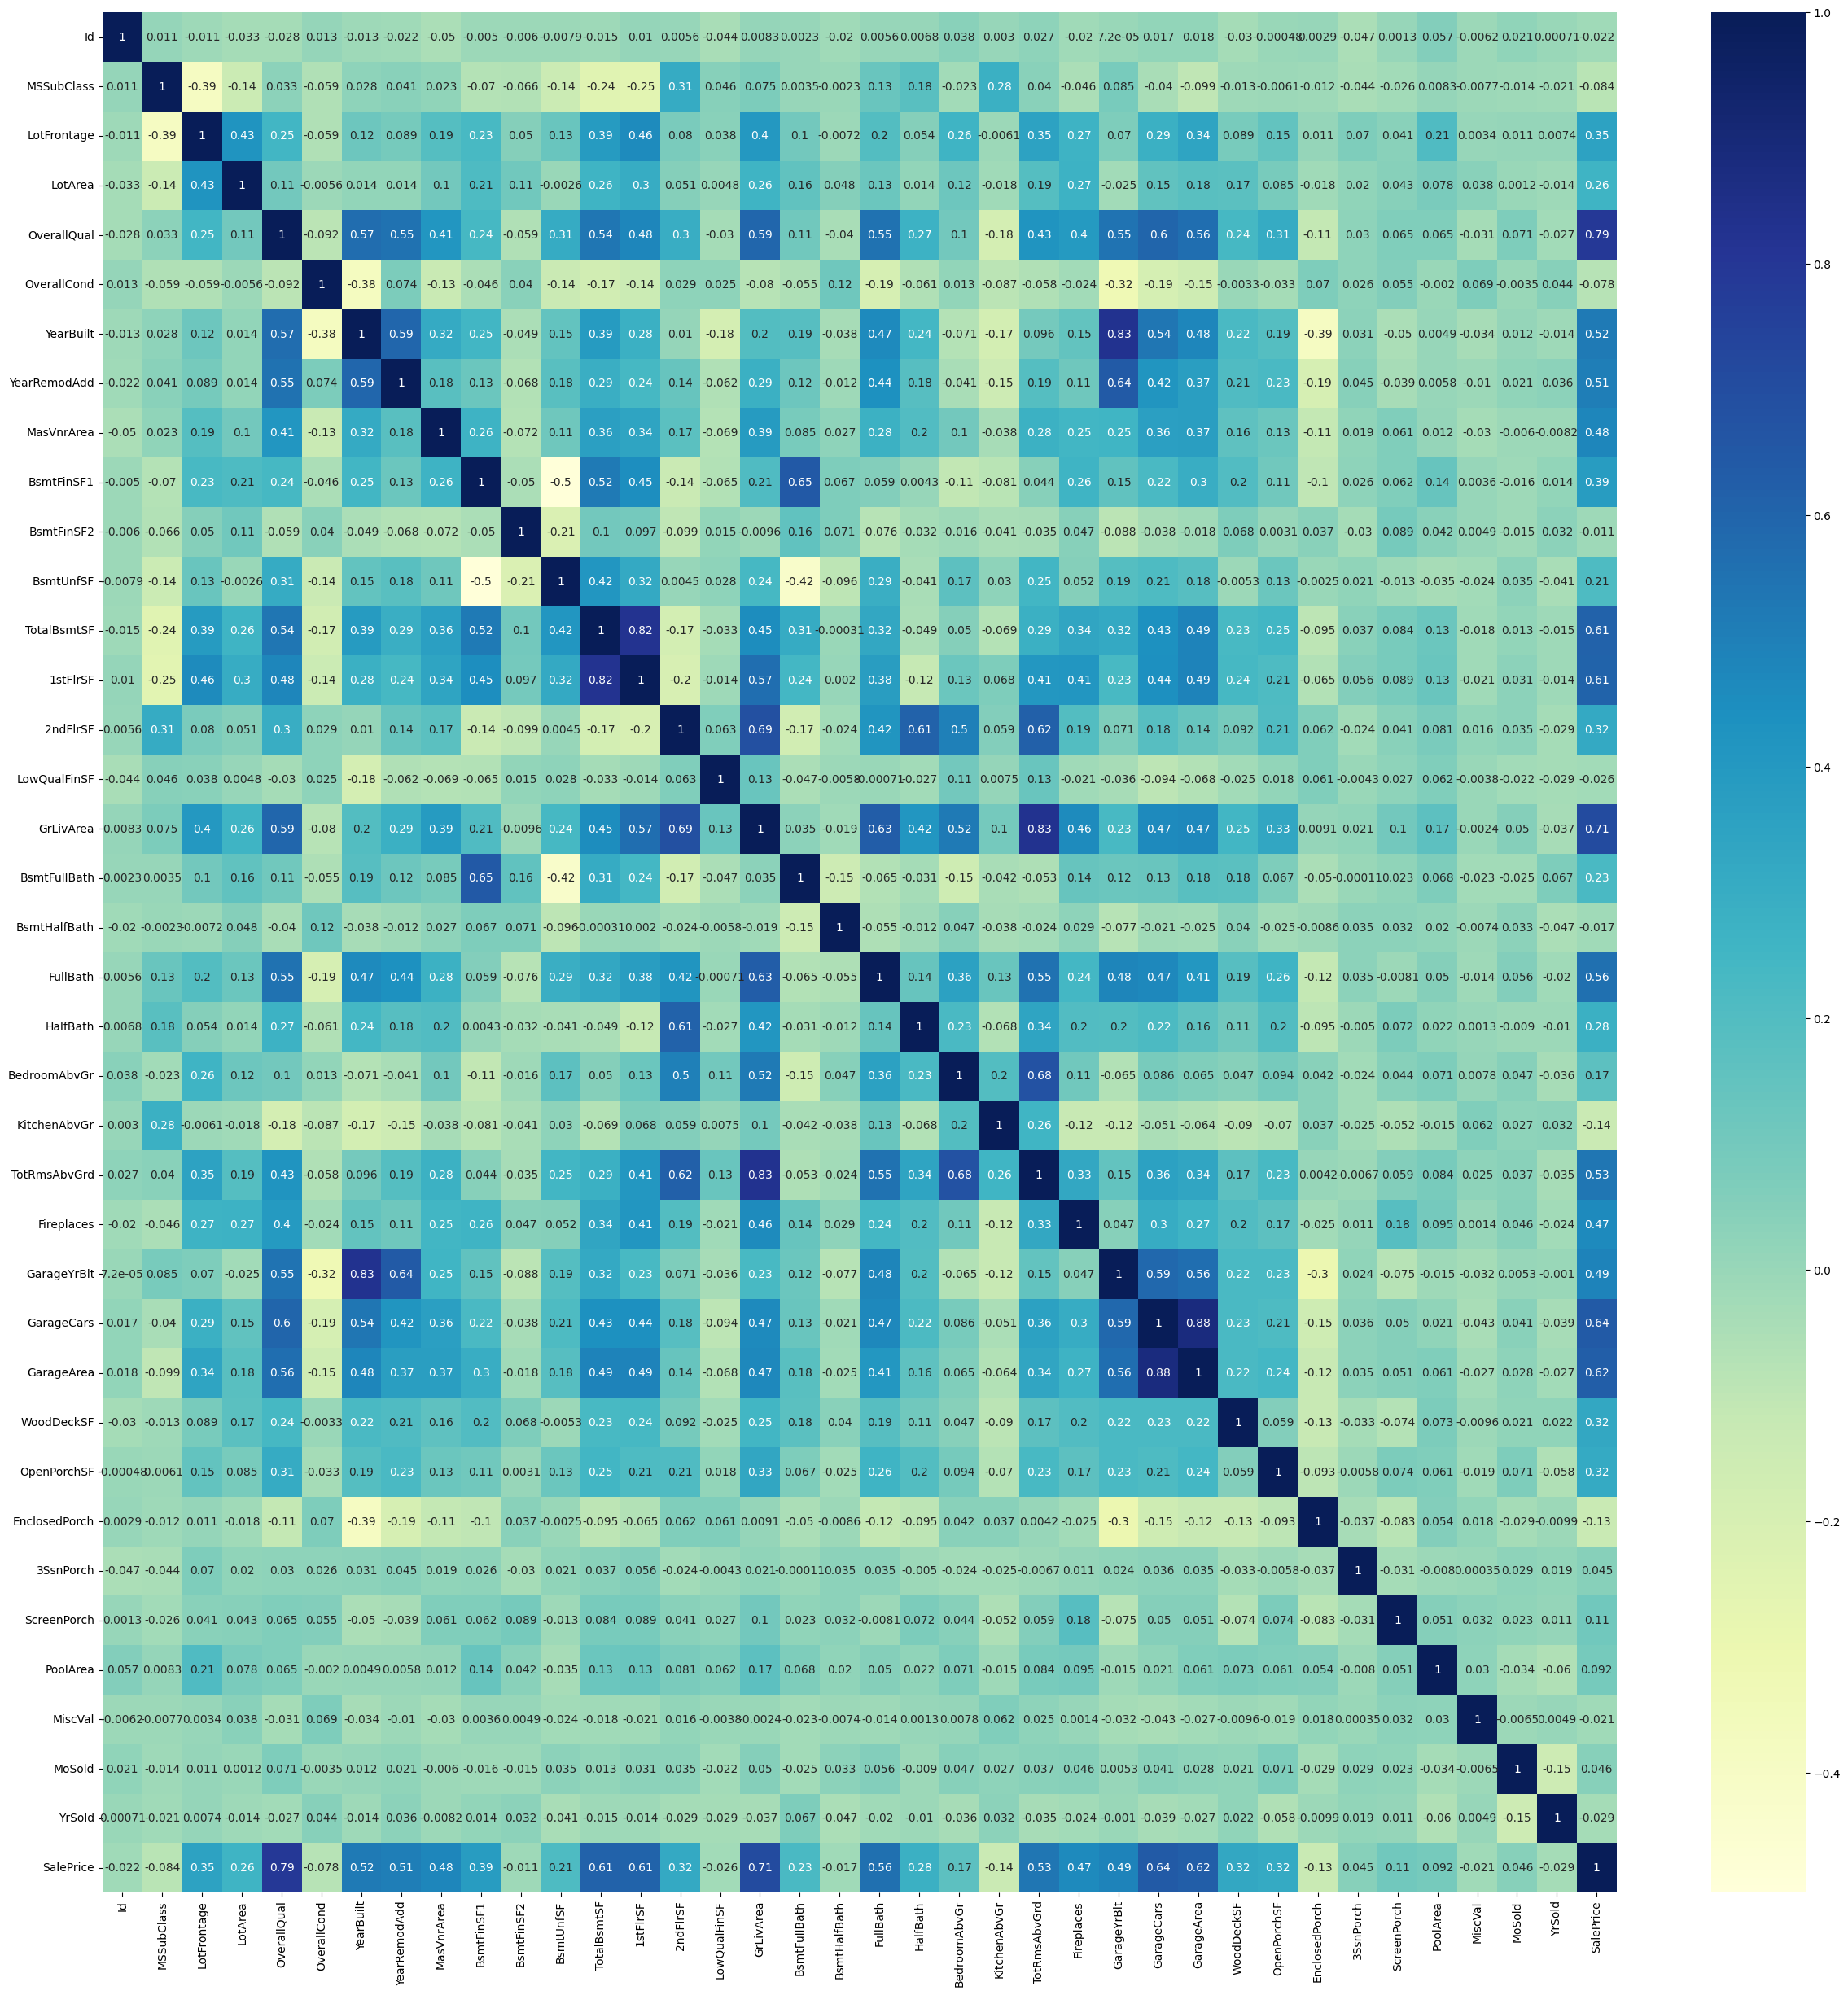

In [8]:
plt.figure(figsize = (30, 30))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

## Numerical Variables

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
numerical_features = []

for feature in train_data.columns:
  if train_data[feature].dtypes != 'O':
    numerical_features.append(feature)

print(len(numerical_features))

38


In [11]:
train_data[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
# list of variables that contain year information

year_features  = []

for feature in numerical_features:
  #print(feature)
  if 'Year' in feature or 'Yr' in feature:
    year_features.append(feature)

In [13]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price VS YearSold')

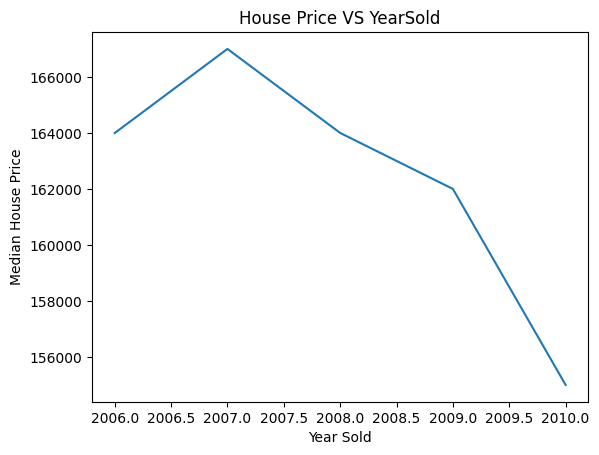

In [14]:
# Checking the relation between the year the house was sold and the SalesPrice

train_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price VS YearSold')


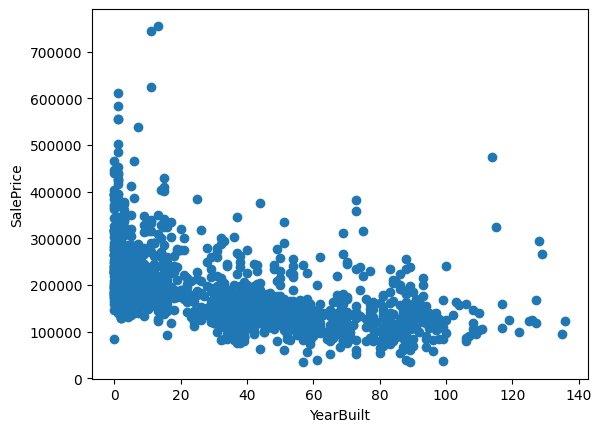

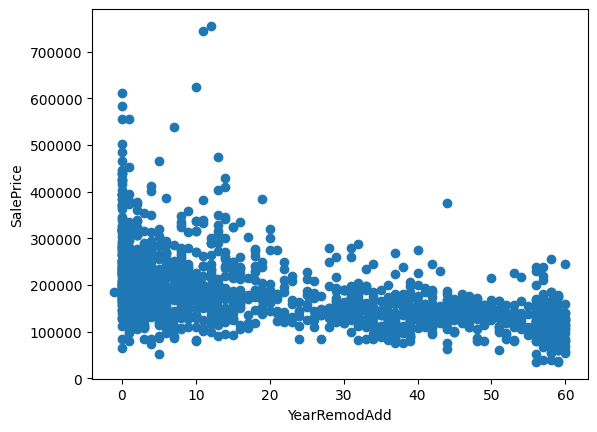

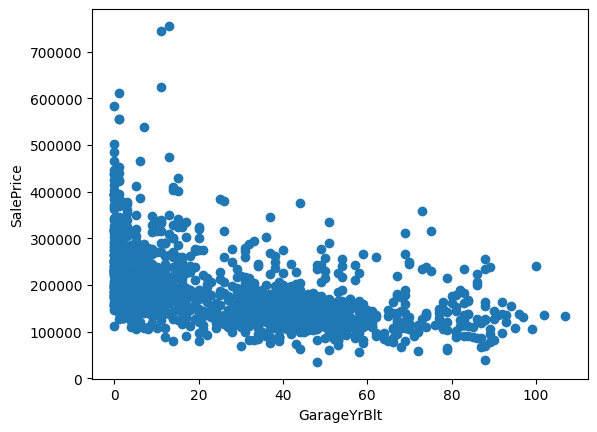

In [15]:
for feature in year_features:
    if feature!='YrSold':
        data=train_data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


In [16]:
# Finding the discrete features

discrete_feature = []

for feature in numerical_features:
  #print(train_data[feature].unique(), len(train_data[feature].unique()))
  if len(train_data[feature].unique()) < 25 and feature not in year_features:
    discrete_feature.append(feature)

In [17]:
len(discrete_feature)
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [18]:
train_data[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


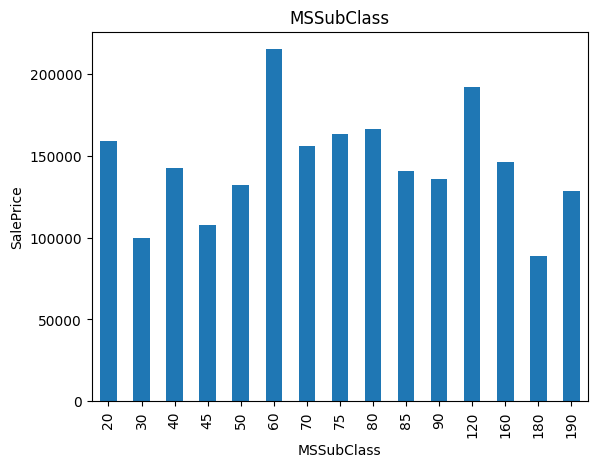

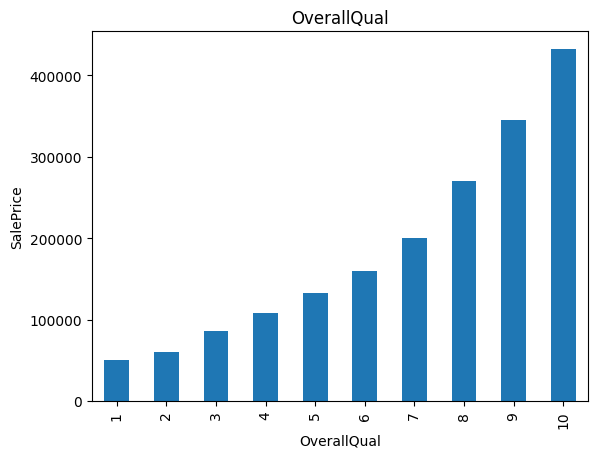

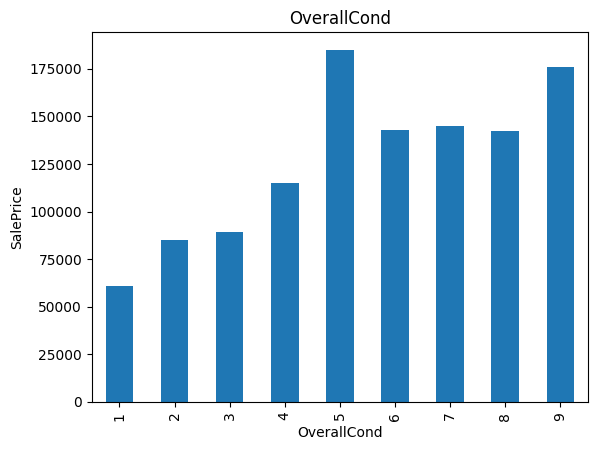

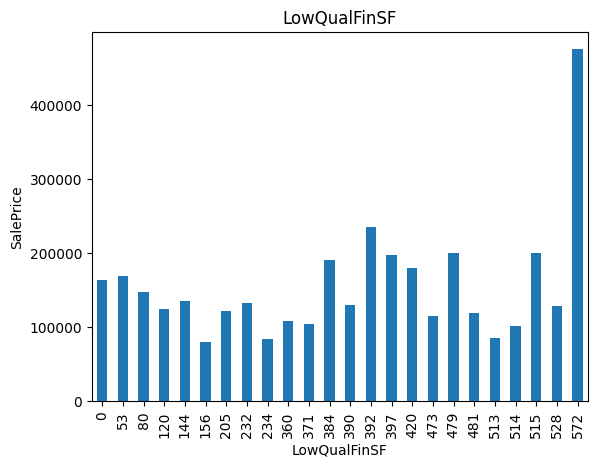

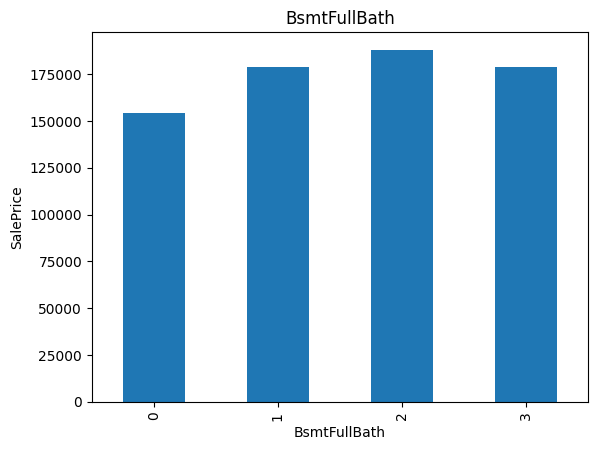

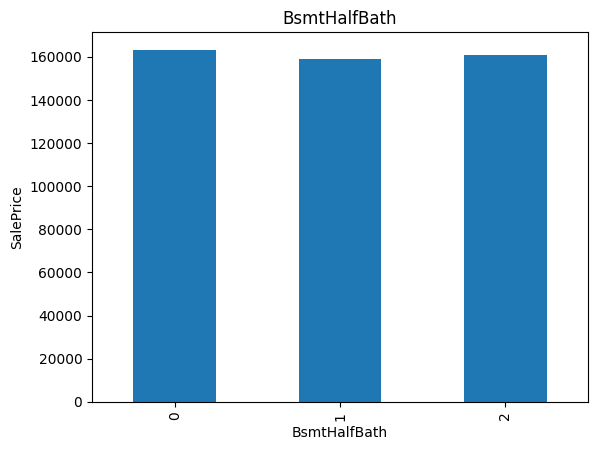

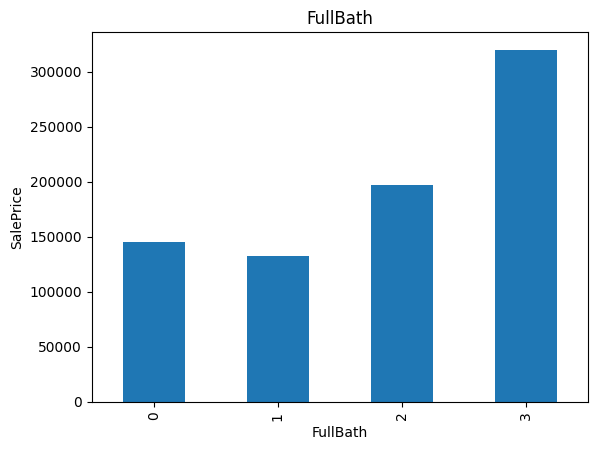

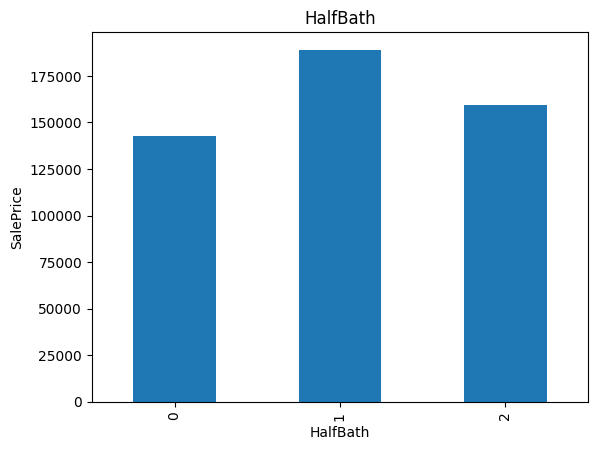

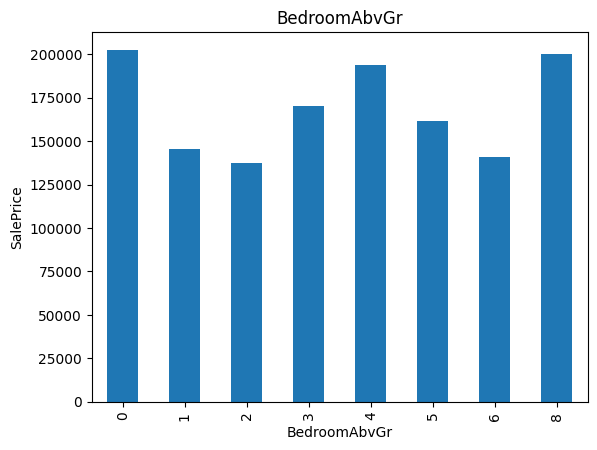

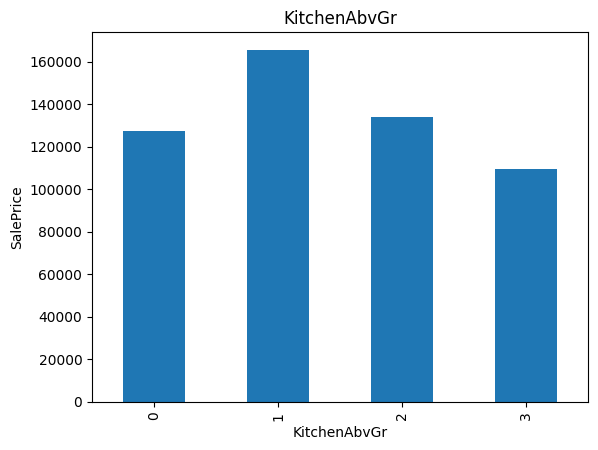

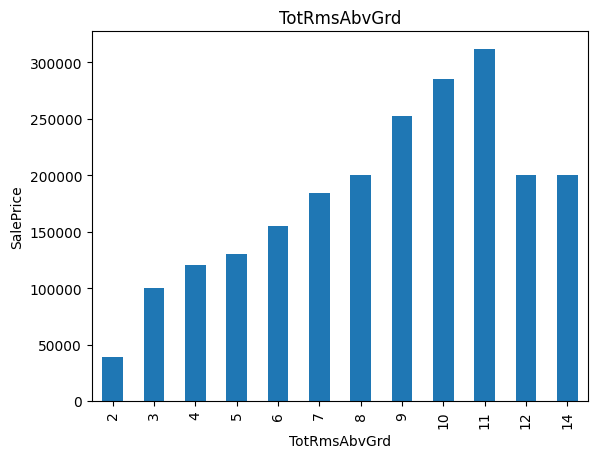

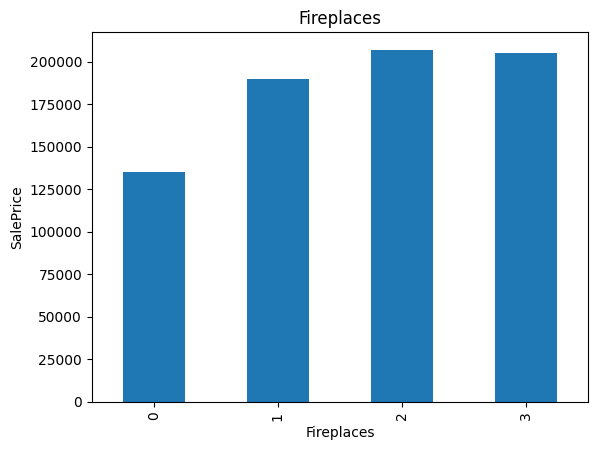

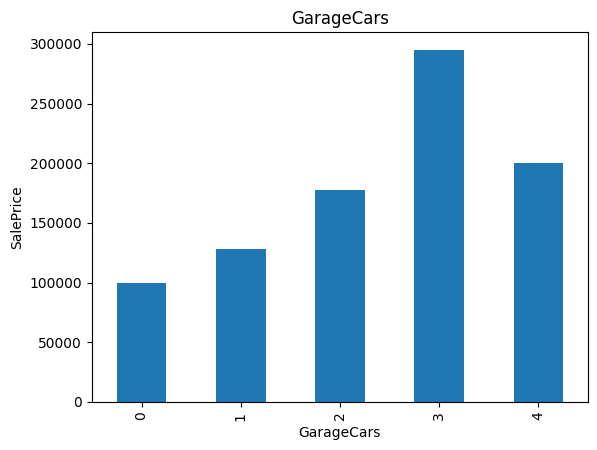

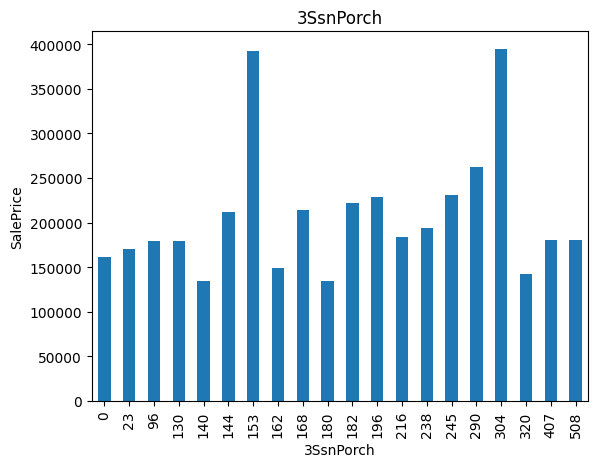

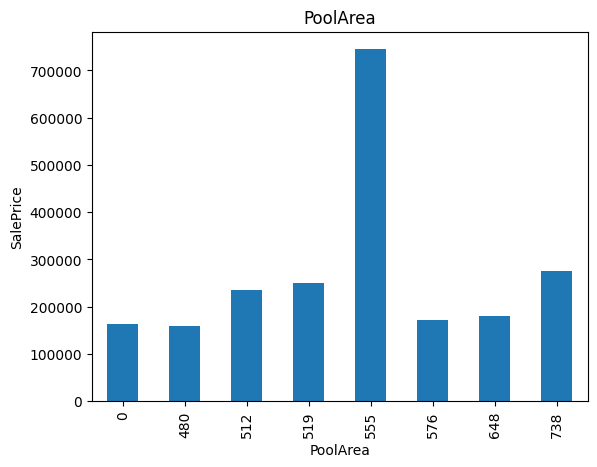

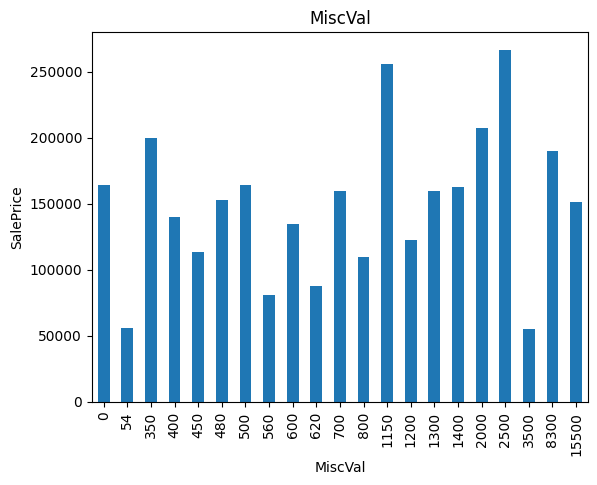

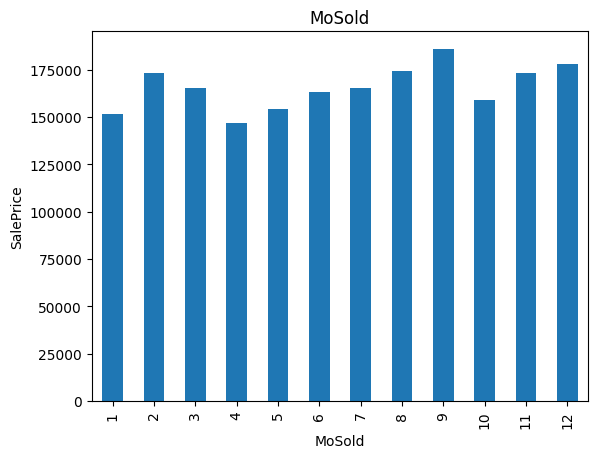

In [19]:
### Lets Find the realtionship between them and Sale price

for feature in discrete_feature:
  #print(train_data.groupby(feature)['SalePrice'])
  d_data = train_data.copy()
  d_data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

In [20]:
## Continuous Feature

Continuous_feature = []

for feature in numerical_features:
  if feature not in discrete_feature + year_features + ['Id']:
    Continuous_feature.append(feature)


In [21]:
Continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [22]:
len(Continuous_feature)

16

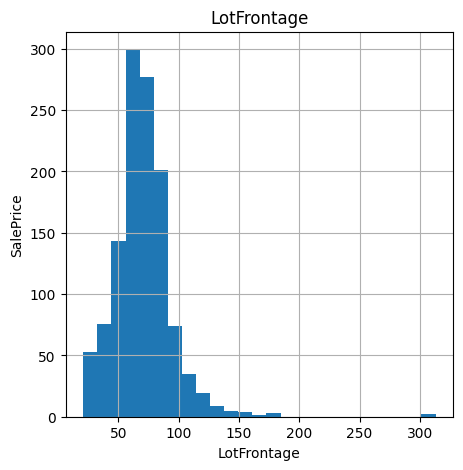

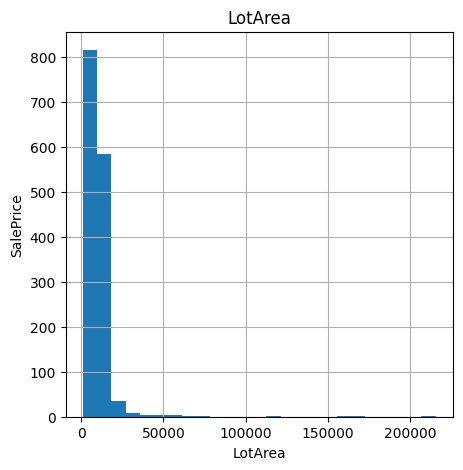

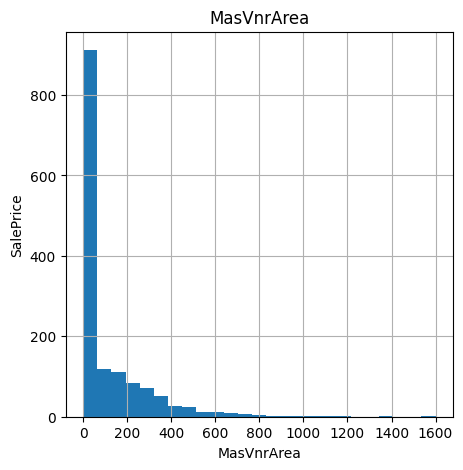

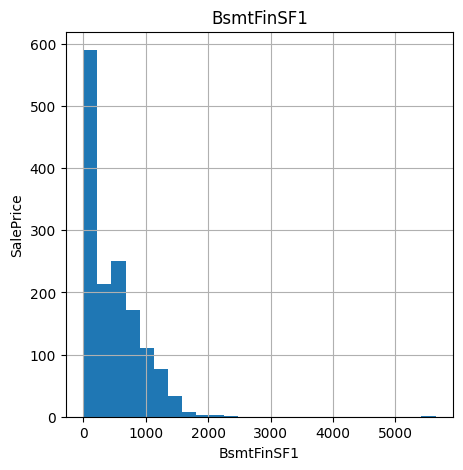

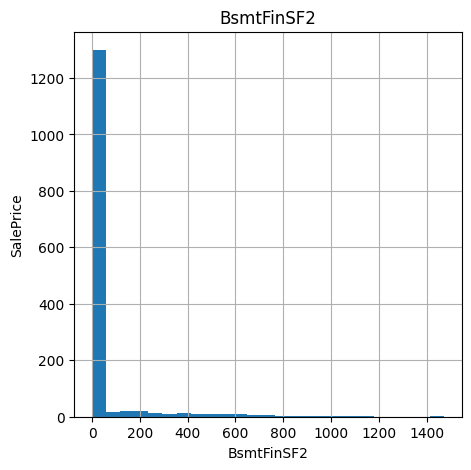

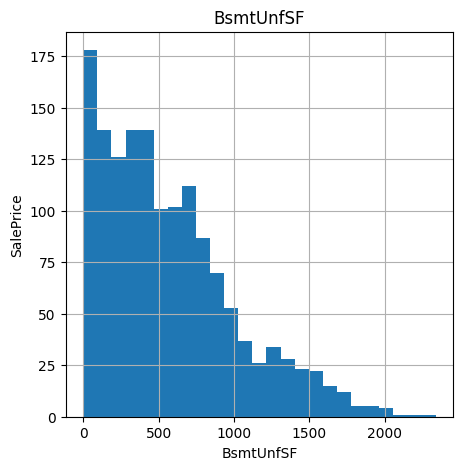

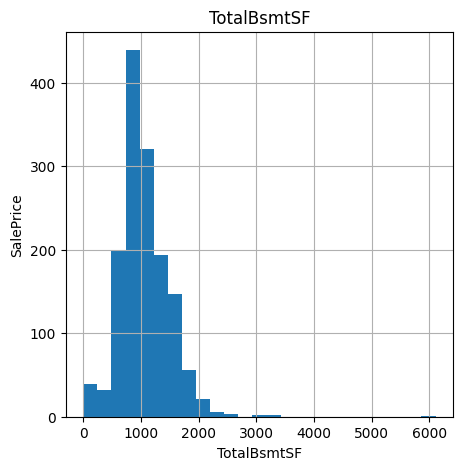

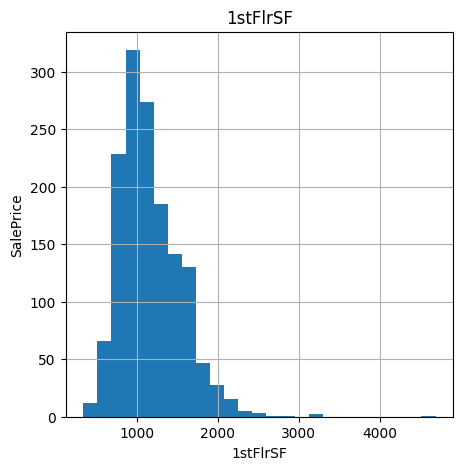

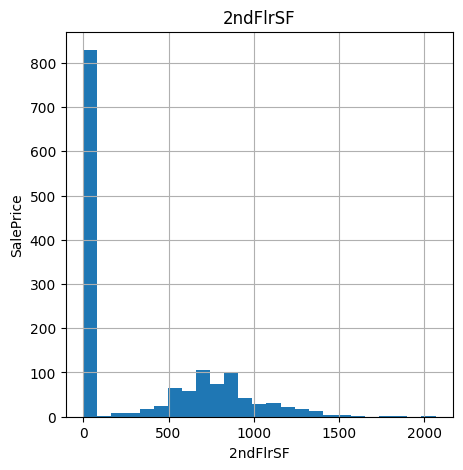

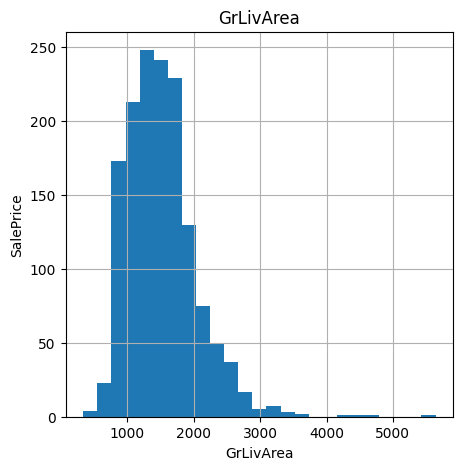

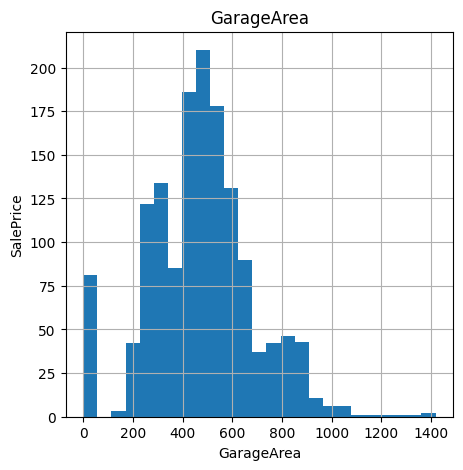

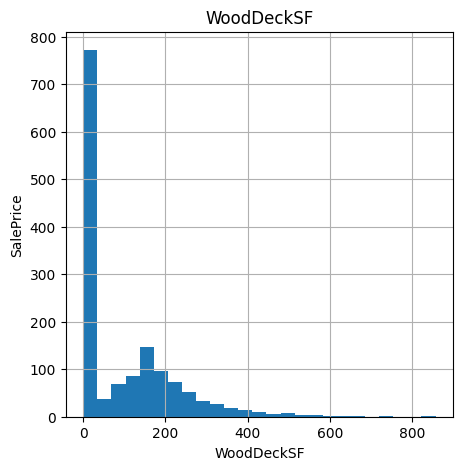

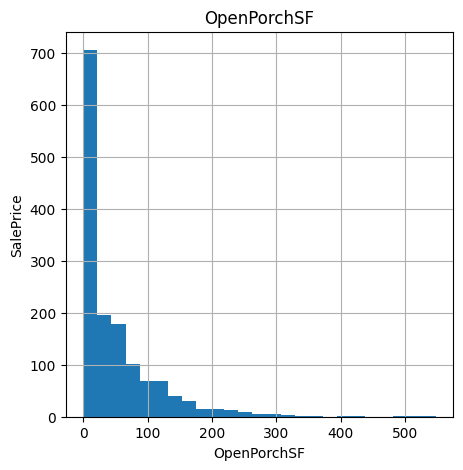

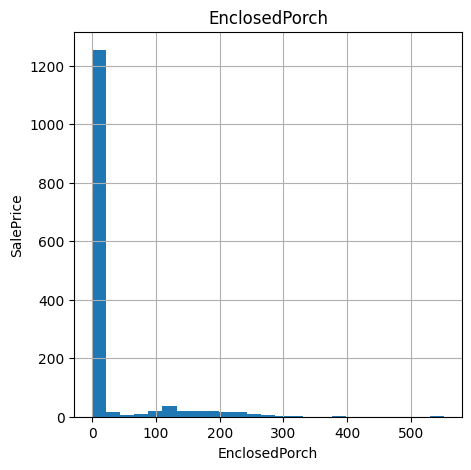

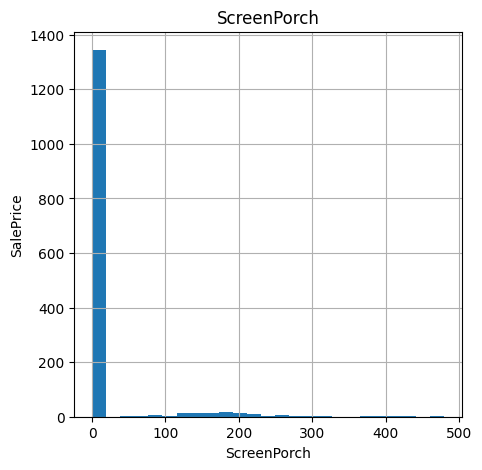

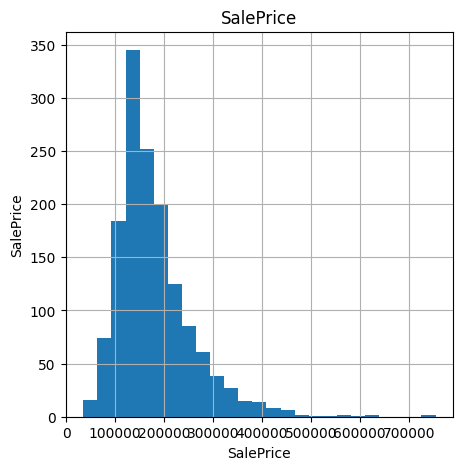

In [23]:
for feature in Continuous_feature:
  plt.figure(figsize=(5, 5))
  #print(train_data.groupby(feature)['SalePrice'])
  d_data = train_data.copy()
  d_data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

In [166]:
# The above plot shows that the data is skewed, So we will use log transform and normalise the data. (Gaussian Curve)

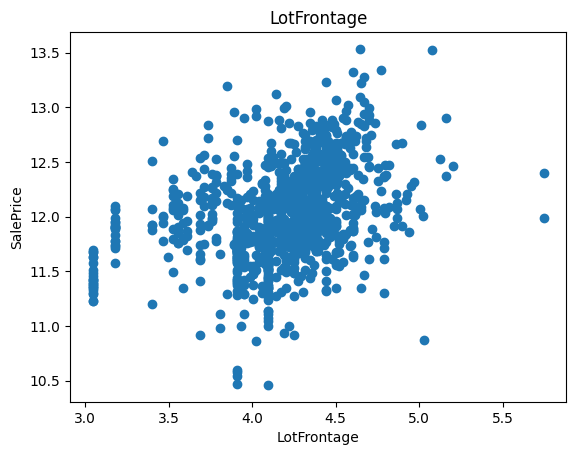

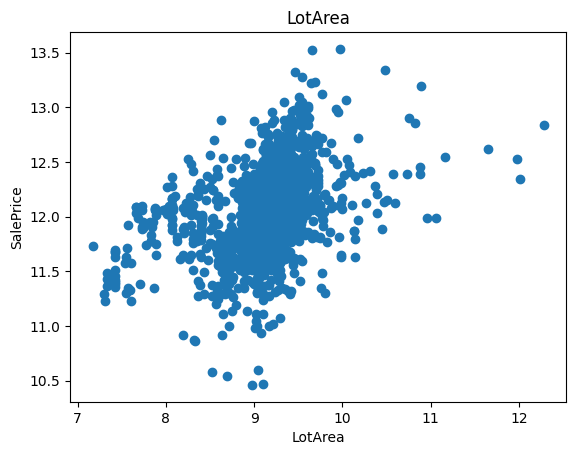

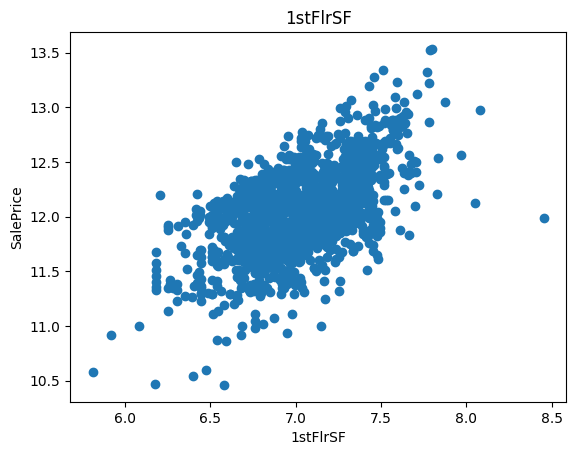

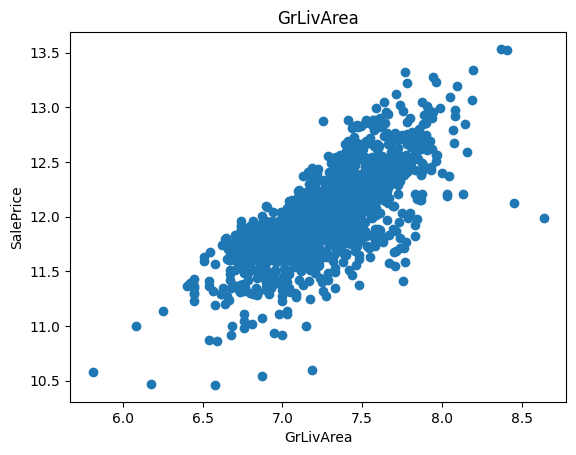

In [24]:
for feature in Continuous_feature:
  data = train_data.copy()
  if 0 in data[feature].unique():
    pass
  elif feature != 'SalePrice':
    data[feature] = np.log(data[feature])
    data['SalePrice'] = np.log(data['SalePrice'])
    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [25]:
## Checking for Outliers

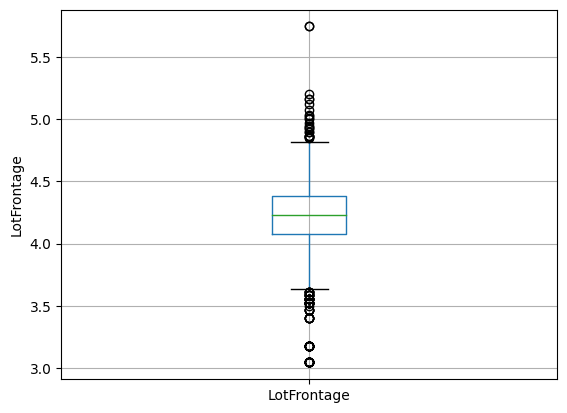

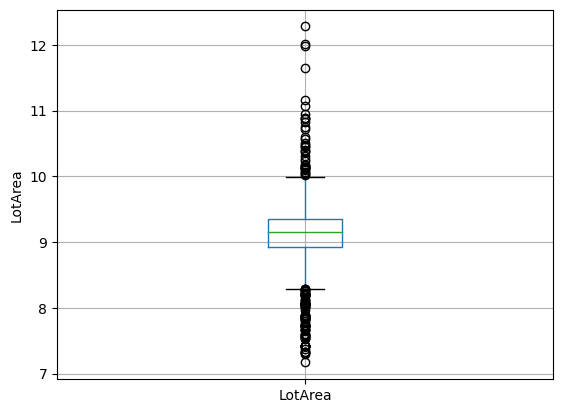

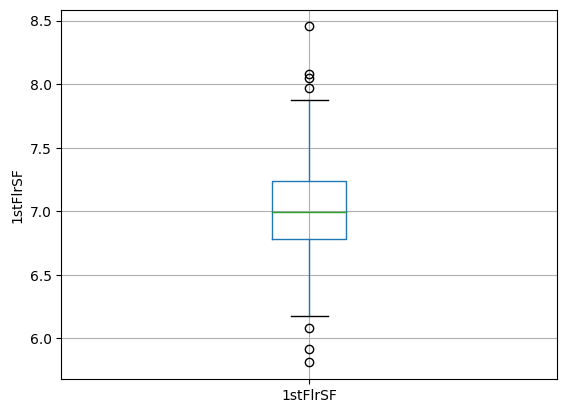

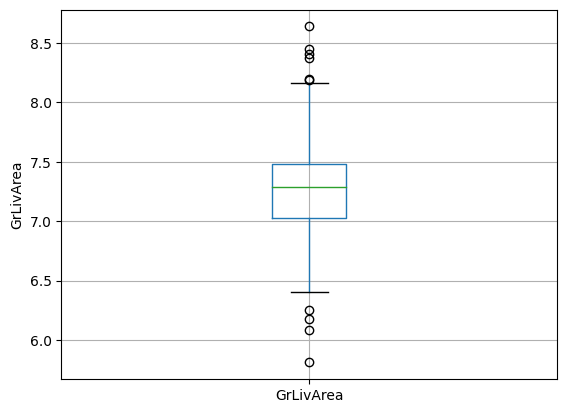

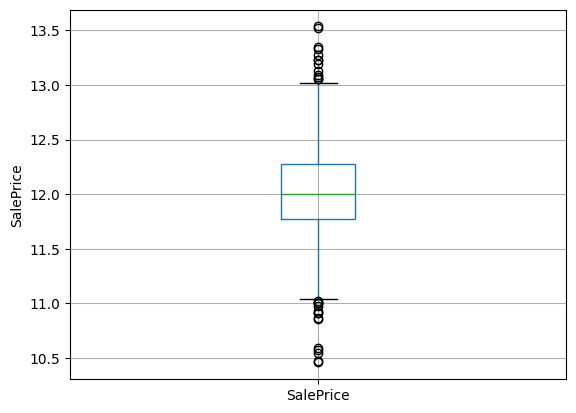

In [26]:
for feature in Continuous_feature:
  data = train_data.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.show()

### Categorical Features

In [27]:
categorical_features = []
for feature in train_data.columns:
  if train_data[feature].dtypes == 'O':
    categorical_features.append(feature)

In [28]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [29]:
train_data[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [30]:
# Checking for the unique categorical values in each column and its count.
for feature in categorical_features:
  print(feature, '|', len(train_data[feature].unique()), '|' , train_data[feature].unique())

MSZoning | 5 | ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street | 2 | ['Pave' 'Grvl']
Alley | 3 | [nan 'Grvl' 'Pave']
LotShape | 4 | ['Reg' 'IR1' 'IR2' 'IR3']
LandContour | 4 | ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities | 2 | ['AllPub' 'NoSeWa']
LotConfig | 5 | ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope | 3 | ['Gtl' 'Mod' 'Sev']
Neighborhood | 25 | ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 | 9 | ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 | 8 | ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType | 5 | ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle | 8 | ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle | 6 | ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl | 8 | ['CompShg' 'WdShngl

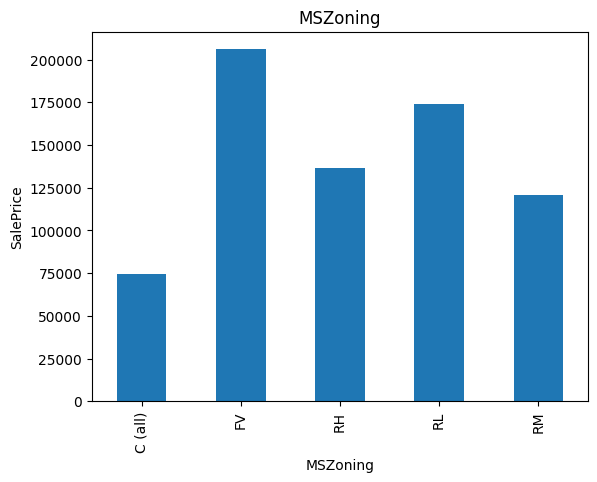

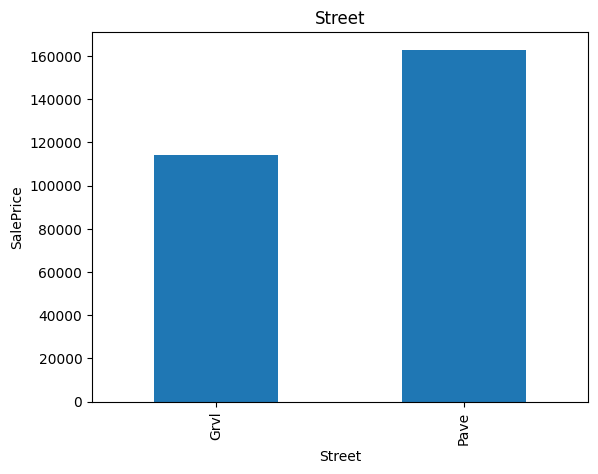

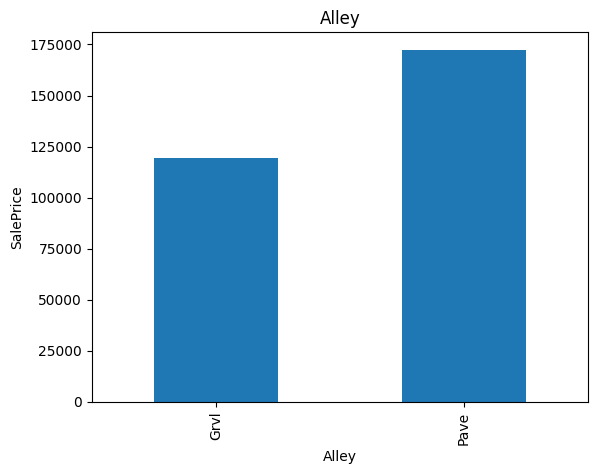

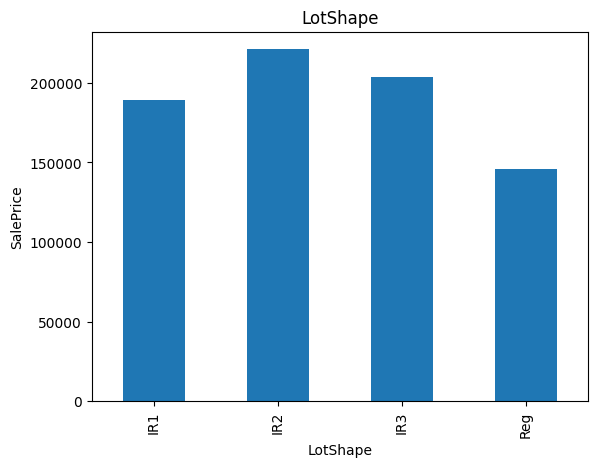

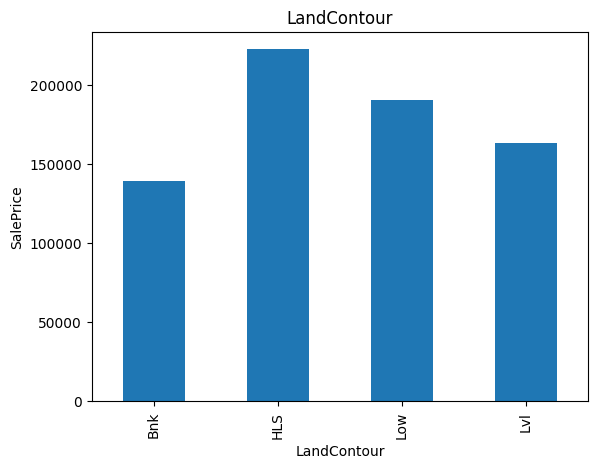

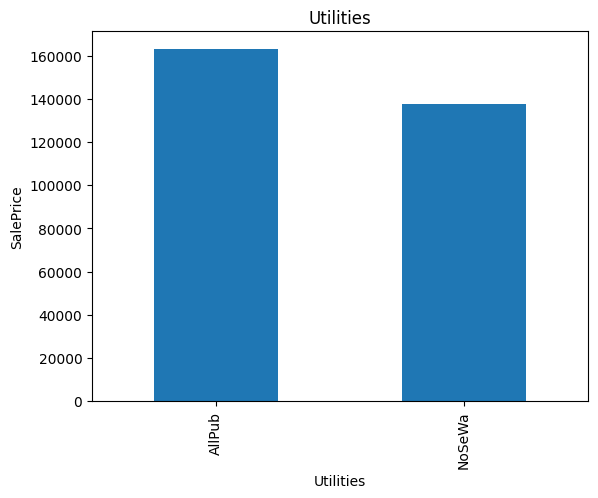

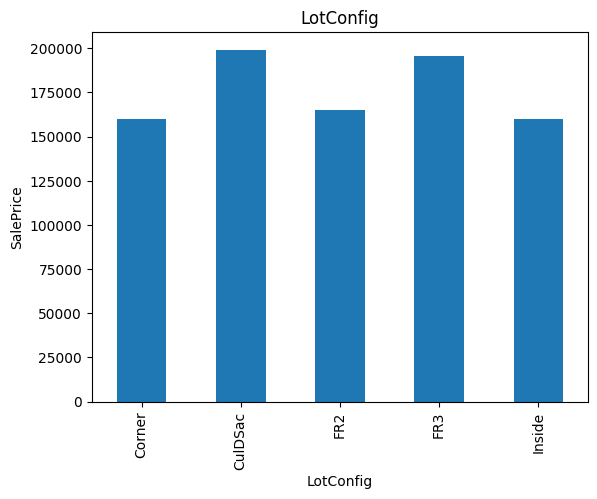

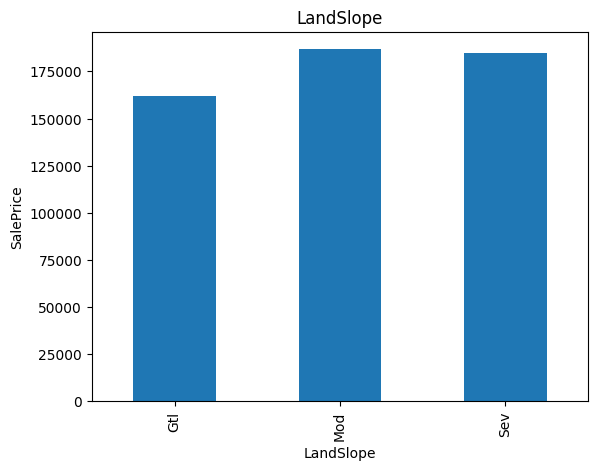

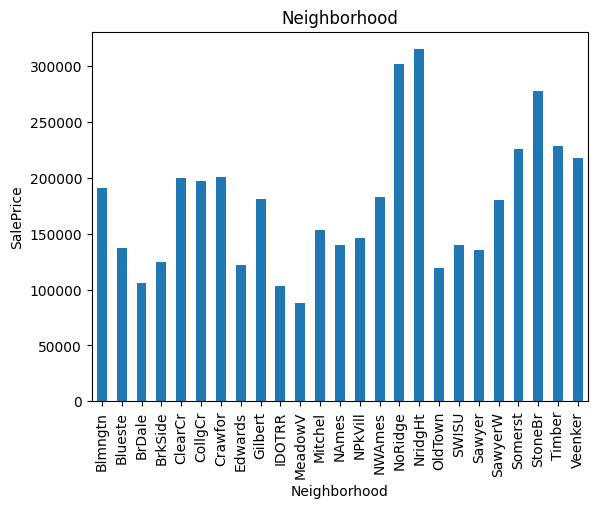

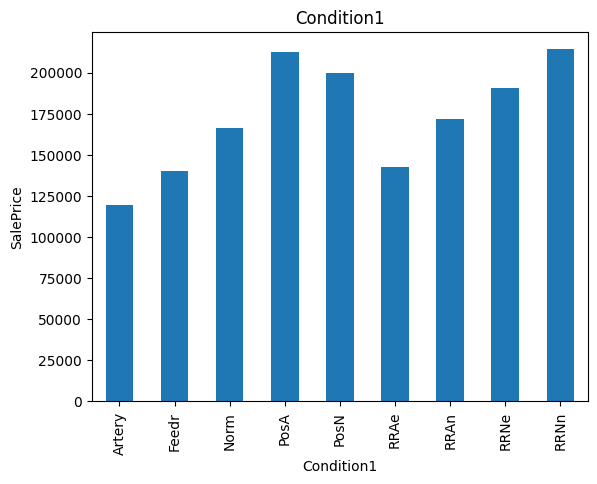

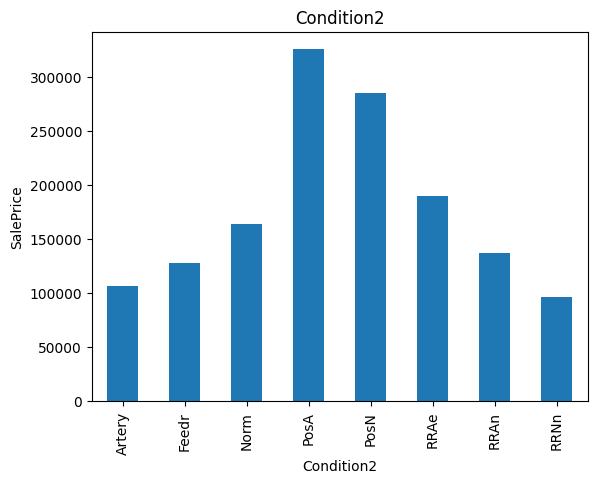

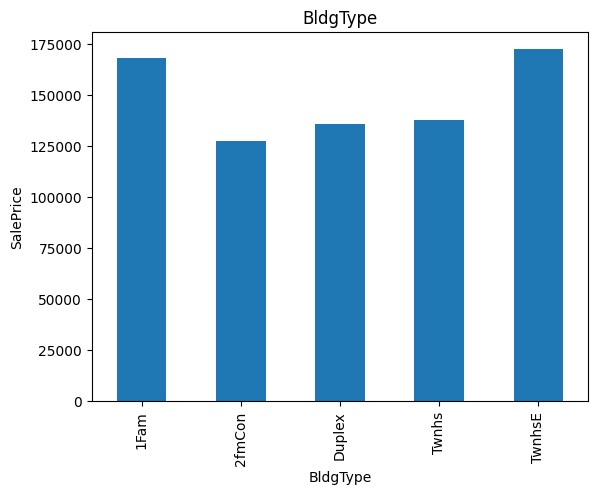

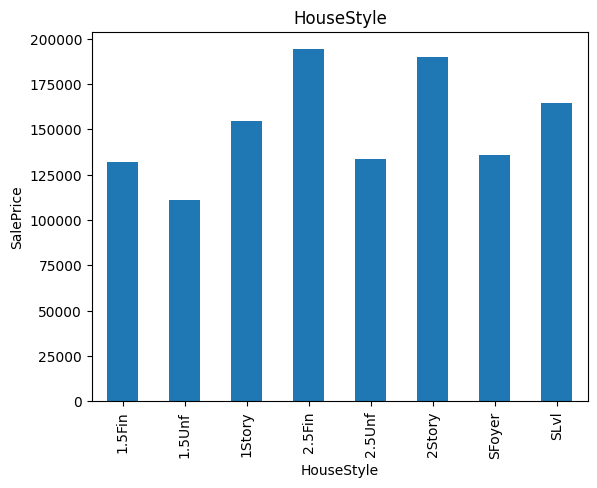

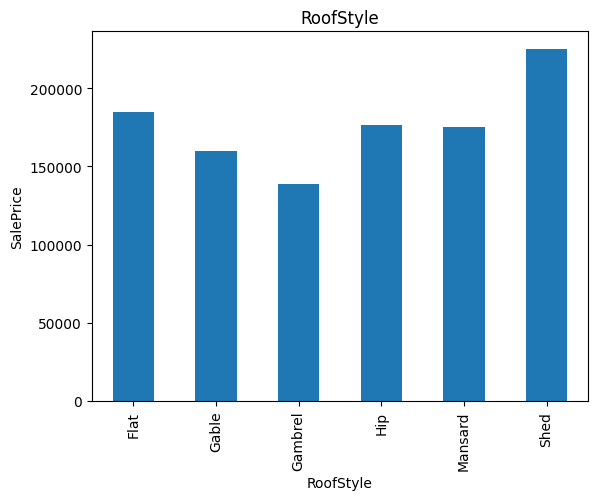

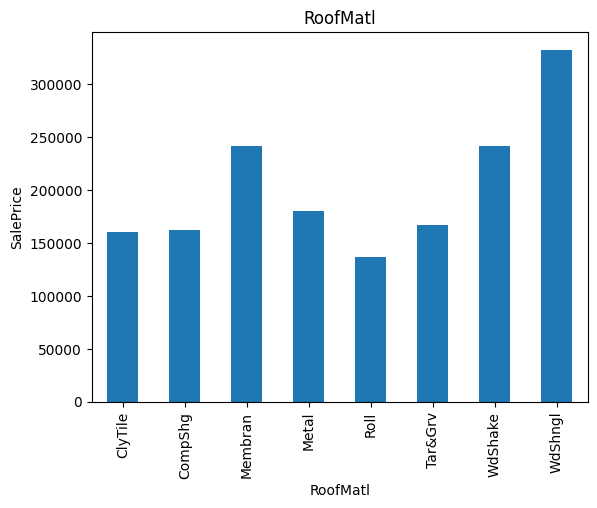

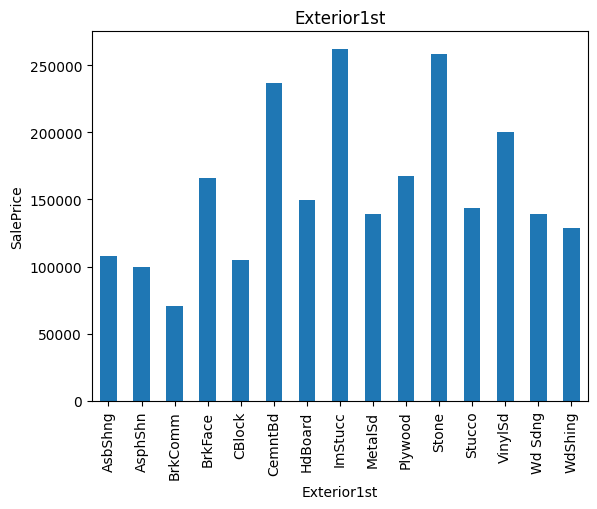

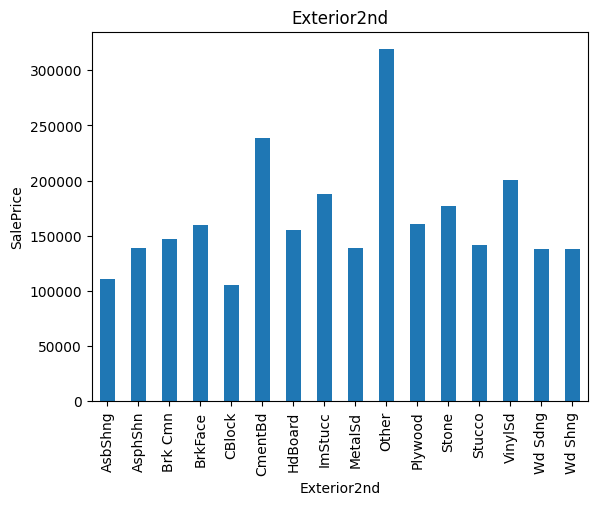

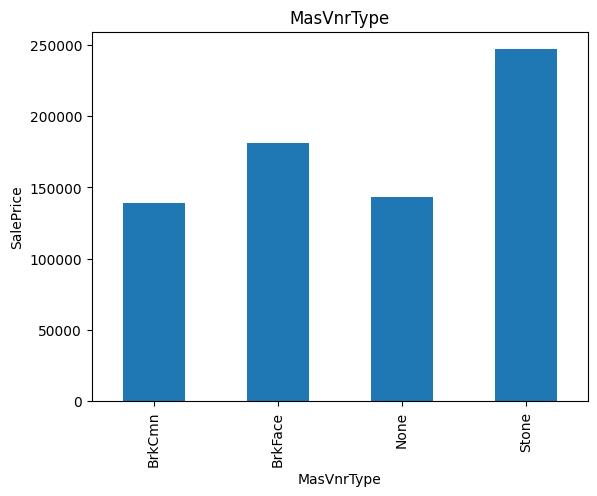

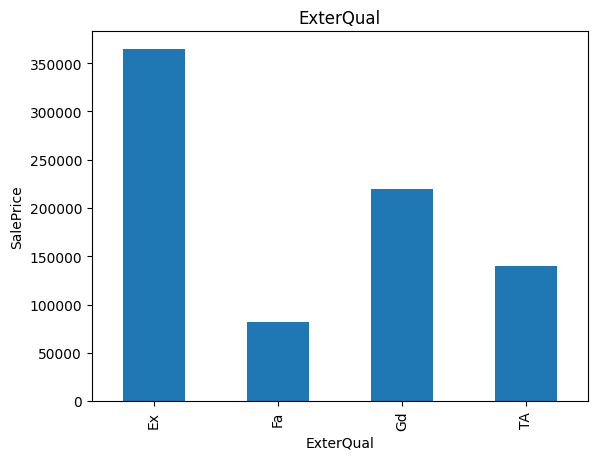

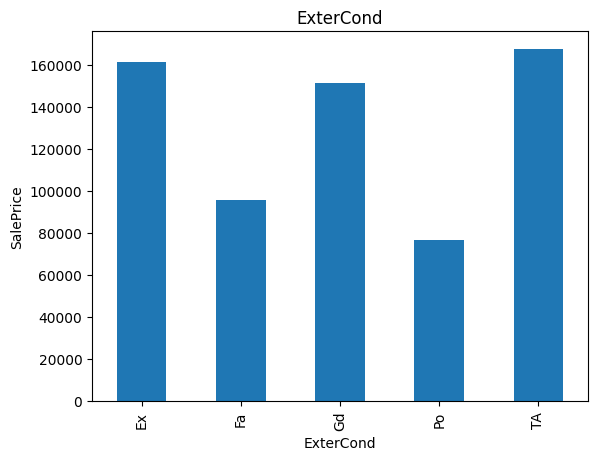

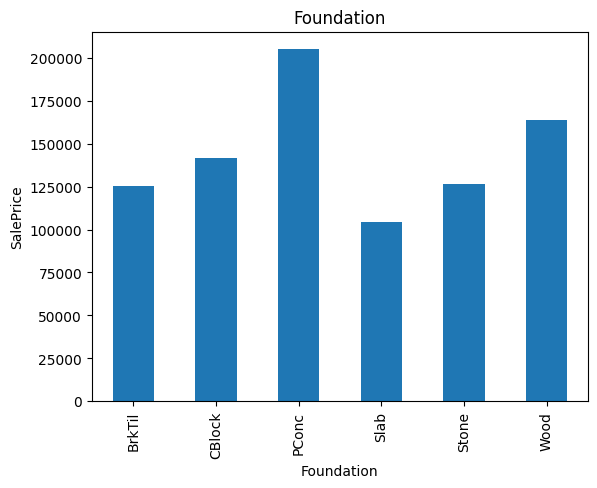

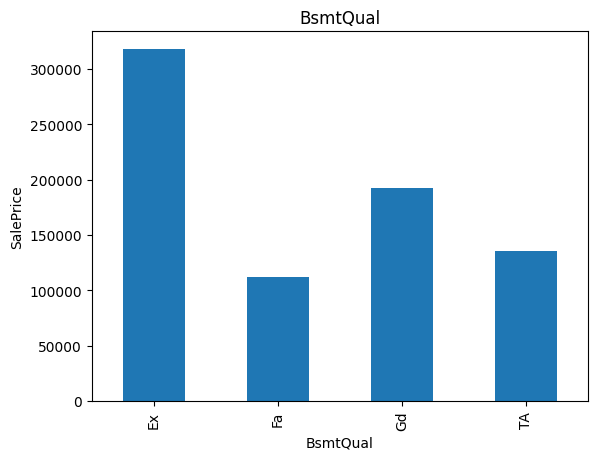

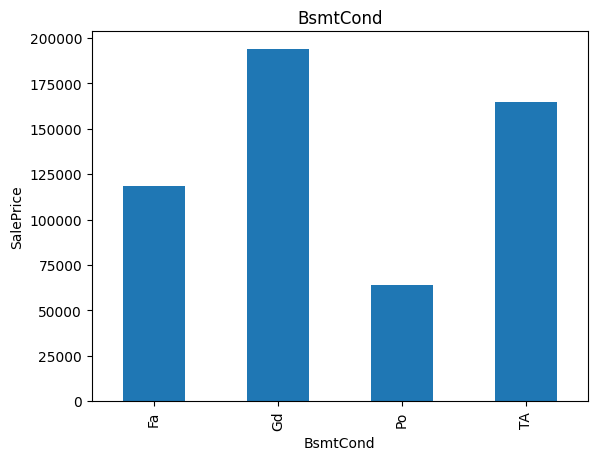

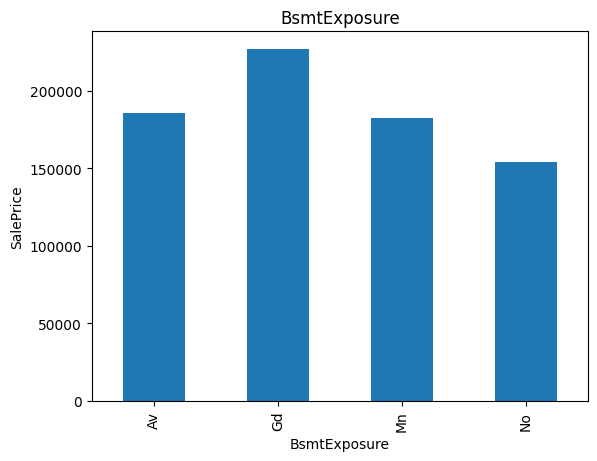

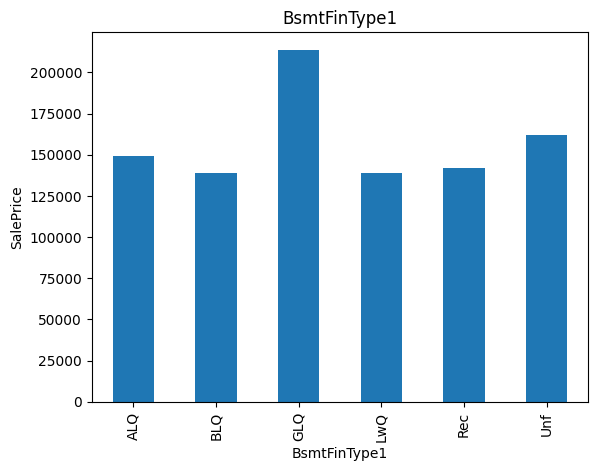

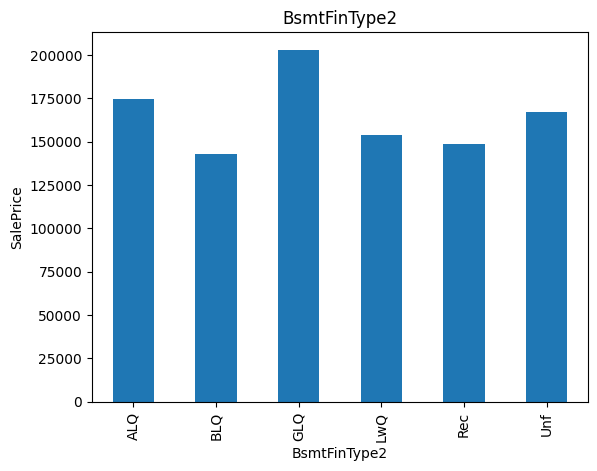

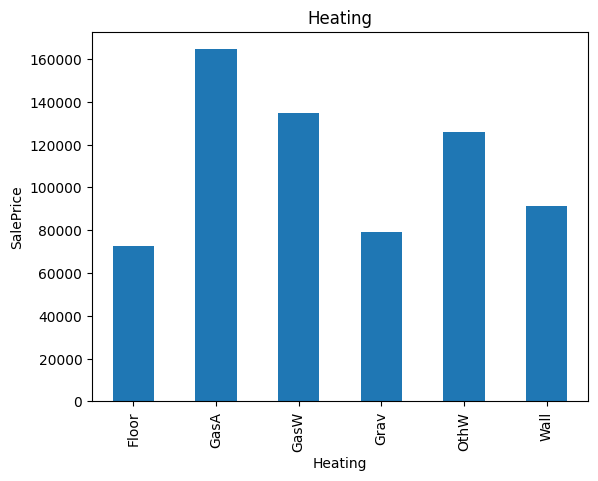

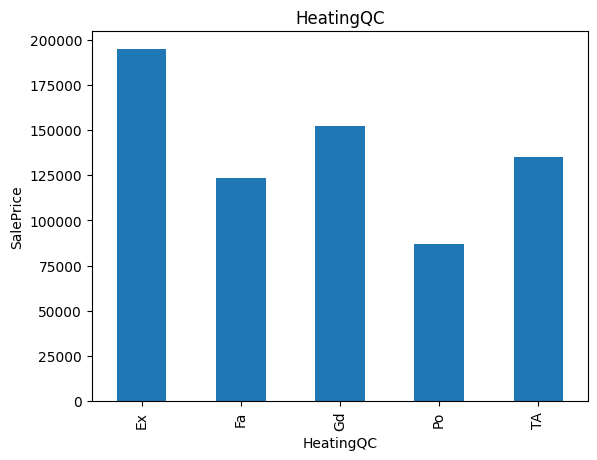

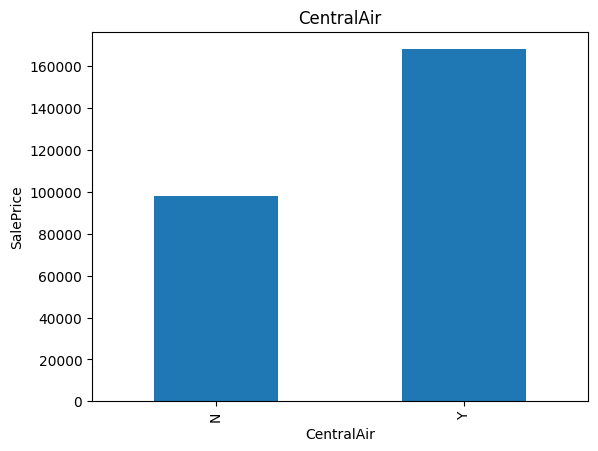

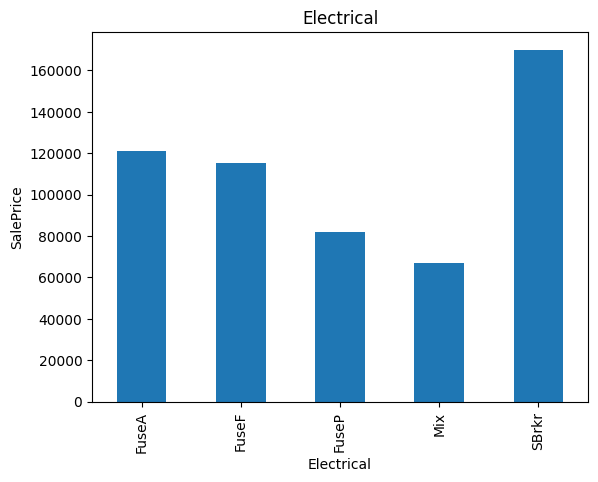

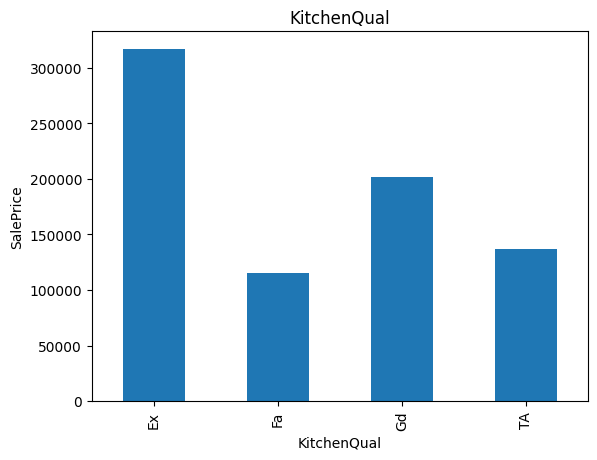

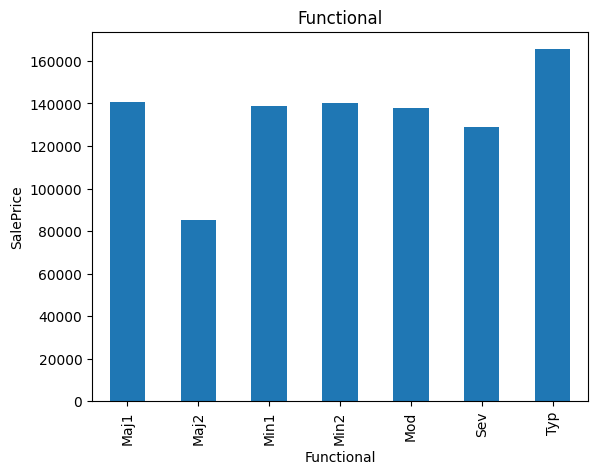

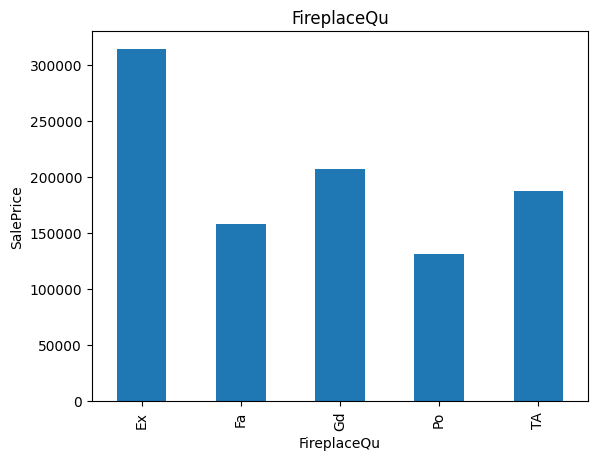

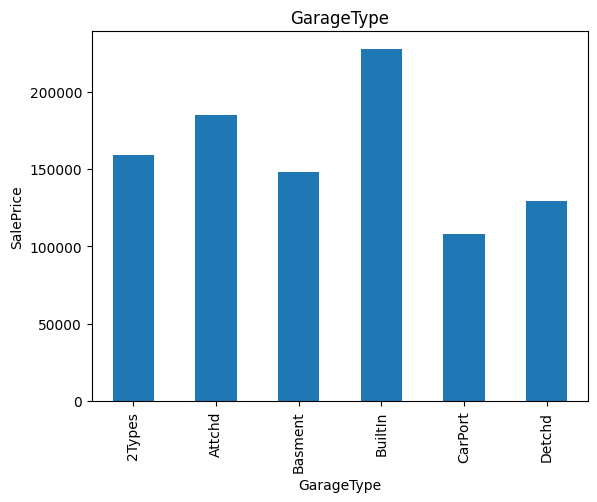

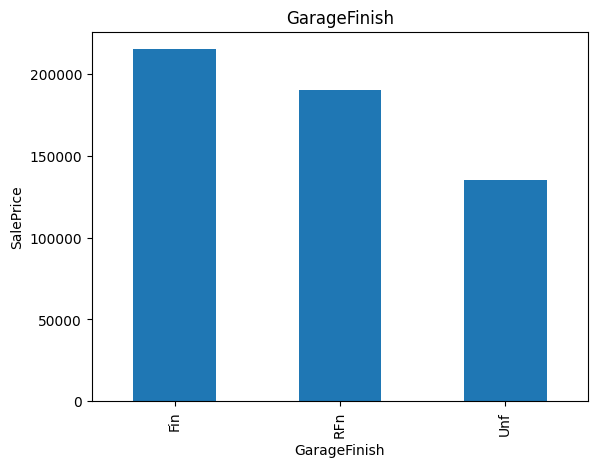

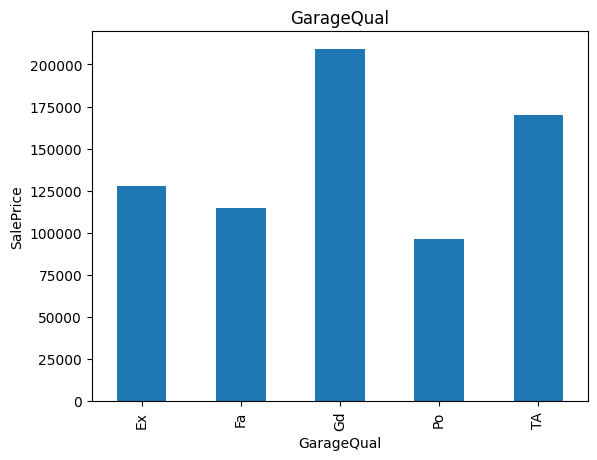

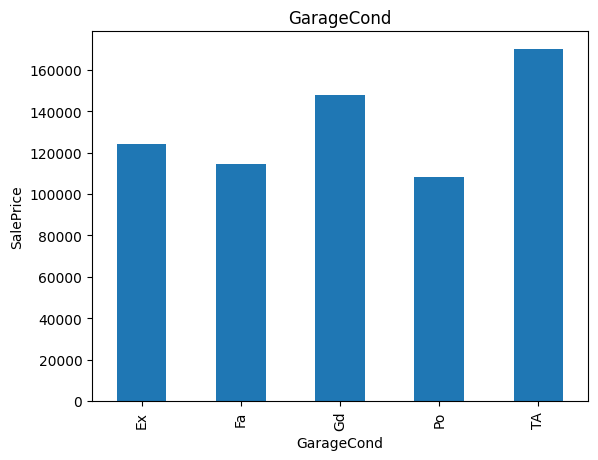

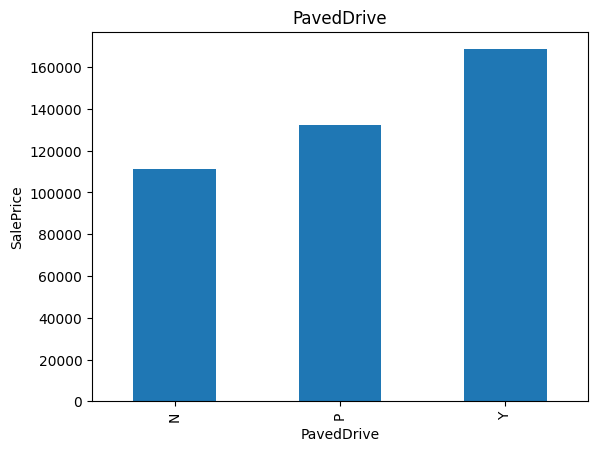

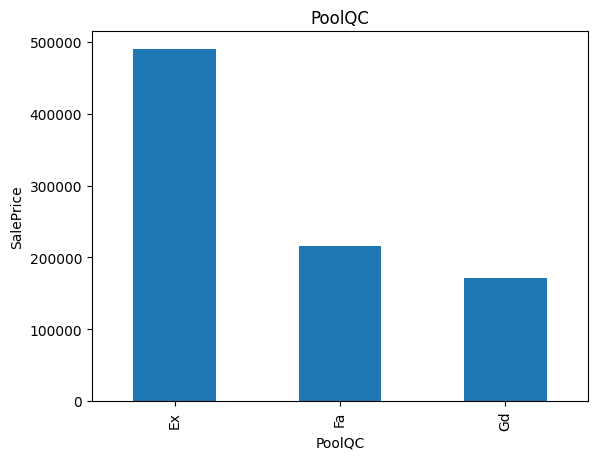

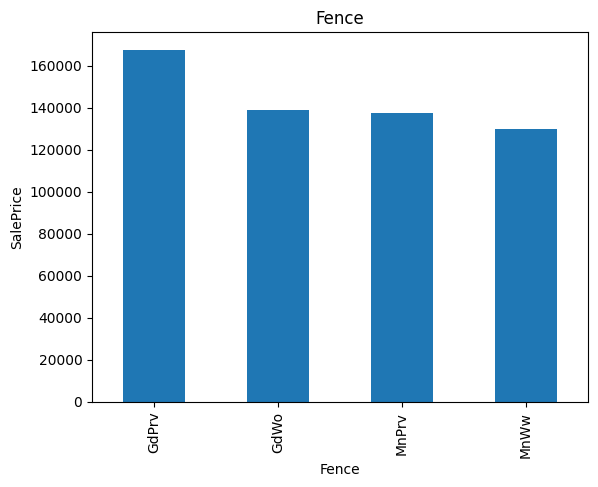

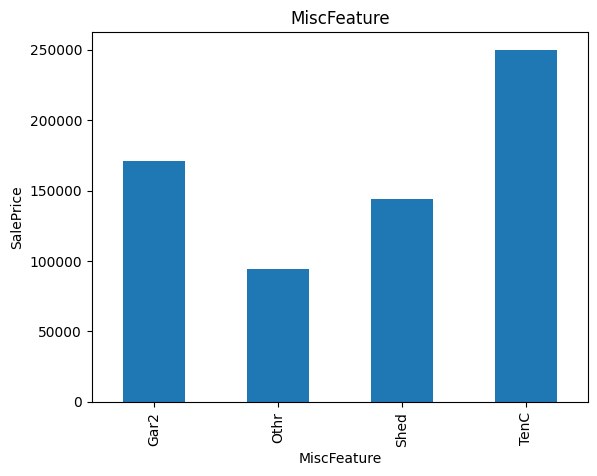

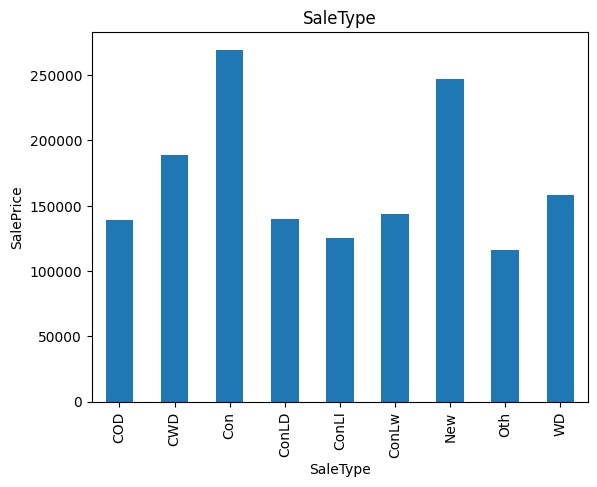

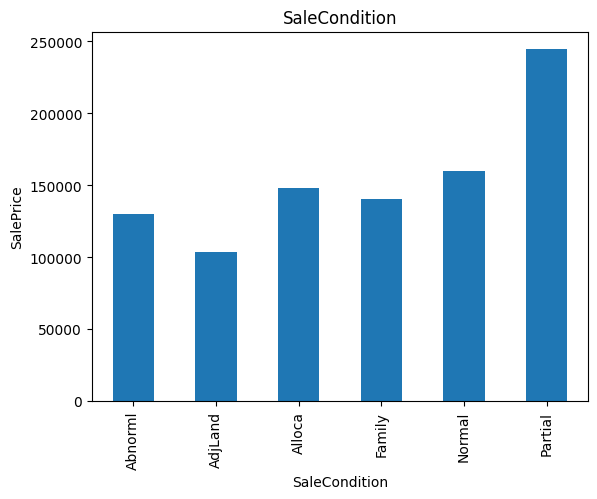

In [31]:
for feature in categorical_features:
  data = train_data.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

## Feature Engineering

#### Steps to be performed
1. Missing values
2. Temporal variables
3. Categorical variables : remove rare labels
4. Standarise the values in the same range.

In [32]:
# Checking for the missing values for the categorical data
null_features_c = []

for feature in train_data.columns:
  if train_data[feature].dtypes == 'O' and train_data[feature].isnull().sum() > 1:
    null_features_c.append(feature)

for feature in null_features_c:
  print(feature, '|', np.round(train_data[feature].isnull().mean(), 4) * 100 , '%')

Alley | 93.77 %
MasVnrType | 0.5499999999999999 %
BsmtQual | 2.53 %
BsmtCond | 2.53 %
BsmtExposure | 2.6 %
BsmtFinType1 | 2.53 %
BsmtFinType2 | 2.6 %
FireplaceQu | 47.260000000000005 %
GarageType | 5.55 %
GarageFinish | 5.55 %
GarageQual | 5.55 %
GarageCond | 5.55 %
PoolQC | 99.52 %
Fence | 80.75 %
MiscFeature | 96.3 %


In [33]:
# Replacing the nan values

temp_data = train_data.copy()
temp_data[null_features_c] = temp_data[null_features_c].fillna('Missing')

train_data = temp_data
train_data[null_features_c].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [34]:
train_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,1,2008,WD,Normal,118000


In [35]:
# Checking for the nan values for the numerical features
null_features_n = []

for feature in train_data.columns:
  if train_data[feature].dtypes != 'O' and train_data[feature].isnull().sum() > 1:
    null_features_n.append(feature)

null_features_n

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [36]:
for feature in null_features_n:
  print(feature, train_data[feature].isnull().mean() * 100 , '%')

LotFrontage 17.73972602739726 %
MasVnrArea 0.547945205479452 %
GarageYrBlt 5.5479452054794525 %


In [37]:
for feature in null_features_n:
  median_value = train_data[feature].median()
  train_data[feature + '_nan'] = np.where(train_data[feature].isnull(), 1, 0)
  train_data[feature].fillna(median_value, inplace = True)

train_data[null_features_n].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [38]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,8,2007,WD,Normal,175000,0,0,0
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2010,WD,Normal,210000,0,0,0
1457,1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,...,Shed,2500,5,2010,WD,Normal,266500,0,0,0
1458,1459,20,RL,68.0,9717,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,4,2010,WD,Normal,142125,0,0,0


In [39]:
# Temporal Variables (Date Time variables)

for feature in year_features[:3]:
  train_data[feature] = train_data['YrSold'] - train_data[feature]


In [40]:
train_data['GarageYrBlt'].unique()

array([  5.,  31.,   7.,   8.,  16.,   3.,  36.,  77.,  69.,  43.,   1.,
        46.,  48.,  40.,  39.,   4.,  51.,   6.,  42.,   2.,  49.,  88.,
        14.,  55.,  57.,  28.,  41.,  24.,  47.,  29.,  10.,  21.,  25.,
        45.,  44.,   0.,  35.,  72.,  20.,  11.,  65.,  53.,  34.,  95.,
        52.,  60.,  30.,  33.,  15.,  27.,  56., 107.,  90.,  54.,  62.,
        37.,  50.,  26.,   9.,  38.,  17.,  12.,  78.,  70.,  32.,  83.,
        81.,  19.,  22.,  86.,  13.,  93.,  75.,  82.,  61.,  66.,  18.,
        96.,  59.,  67.,  79.,  89.,  68.,  87.,  74.,  92.,  94.,  71.,
        80.,  58.,  84.,  23.,  76.,  73., 102.,  85.,  97.,  64.,  99.,
       100.,  91.])

#### The numerical features were skewed , so we will try to normalise the data

In [41]:
num_features = ['LotFrontage',
                'LotArea',
                '1stFlrSF',
                'GrLivArea',
                'SalePrice']

for feature in num_features:
  train_data[feature] = np.log(train_data[feature])


In [42]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [43]:
# Removing the categorical feature variables which are less than 1%.
categorical_features
train_data['MSZoning'][88]

'C (all)'

In [44]:
var = train_data[categorical_features]['MSZoning'].unique()
var

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [46]:
original_copy = train_data.copy()
for feature in categorical_features:
  print("==================", feature, "=================================")
  f = feature
  feature = dict(original_copy[feature].value_counts())
  print(feature)
  for key, value in feature.items():
    print(key, value / original_copy.shape[0])
    if value / original_copy.shape[0] < 0.01:
      print('-->', key, value / original_copy.shape[0])
      original_copy[f].replace([key], ['Rare_var'], inplace = True)
      print(original_copy[f].unique())


train_data = original_copy.copy()


================== MSZoning =================================
{'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10}
RL 0.7883561643835616
RM 0.14931506849315068
FV 0.04452054794520548
RH 0.010958904109589041
C (all) 0.00684931506849315
--> C (all) 0.00684931506849315
['RL' 'RM' 'Rare_var' 'FV' 'RH']
================== Street =================================
{'Pave': 1454, 'Grvl': 6}
Pave 0.9958904109589041
Grvl 0.00410958904109589
--> Grvl 0.00410958904109589
['Pave' 'Rare_var']
================== Alley =================================
{'Missing': 1369, 'Grvl': 50, 'Pave': 41}
Missing 0.9376712328767123
Grvl 0.03424657534246575
Pave 0.028082191780821917
================== LotShape =================================
{'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}
Reg 0.6335616438356164
IR1 0.3315068493150685
IR2 0.028082191780821917
IR3 0.00684931506849315
--> IR3 0.00684931506849315
['Reg' 'IR1' 'IR2' 'Rare_var']
================== LandContour =================================
{'L

In [189]:
train_data.groupby(['MSZoning'])['SalePrice'].mean()

MSZoning
FV          12.246616
RH          11.749840
RL          12.085885
RM          11.692893
Rare_var    11.118259
Name: SalePrice, dtype: float64

In [48]:
for feature in categorical_features:
  labels = train_data.groupby([feature])['SalePrice'].mean().sort_values().index
  labels = {
      k:i for i, k in enumerate(labels, 0)
  }
  train_data[feature] = train_data[feature].map(labels)

In [49]:
labels

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

In [50]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,2,0,12,2008,2,3,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.127134,8.976768,1,2,0,1,1,...,2,0,8,2007,2,3,12.072541,0,0,0
1456,1457,20,3,4.442651,9.486076,1,2,0,1,1,...,2,0,2,2010,2,3,12.254863,0,0,0
1457,1458,70,3,4.189655,9.109636,1,2,0,1,1,...,1,2500,5,2010,2,3,12.493130,0,0,0
1458,1459,20,3,4.219508,9.181632,1,2,0,1,1,...,2,0,4,2010,2,3,11.864462,0,0,0


In [51]:
scaling_feature = []
for feature in train_data.columns:
  if feature not in ['Id', 'SalePrice']:
    scaling_feature.append(feature)

len(scaling_feature)

82

In [52]:
train_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,2,0,12,2008,2,3,12.429216,0,0,0
5,6,50,3,4.442651,9.554993,1,2,1,1,1,...,1,700,10,2009,2,3,11.870600,0,0,0
6,7,20,3,4.317488,9.218705,1,2,0,1,1,...,2,0,8,2007,2,3,12.634603,0,0,0
7,8,60,3,4.234107,9.247829,1,2,1,1,1,...,1,350,11,2009,2,3,12.206073,1,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,...,2,0,4,2008,2,0,11.774520,0,0,0
9,10,190,3,3.912023,8.911934,1,2,0,1,1,...,2,0,1,2008,2,3,11.678440,0,0,0


## Feature Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

feature_scale = [feature for feature in train_data.columns if feature not in ['Id', 'SalePrice']]
scale = MinMaxScaler()
scale.fit(train_data[feature_scale])

MinMaxScaler()

In [54]:
scale.transform(train_data[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [55]:
data = pd.concat(
    [train_data[['Id', 'SalePrice']].reset_index(drop = True),
    pd.DataFrame(scale.transform(train_data[feature_scale]),
                 columns = feature_scale)],
                 axis = 1
)

In [56]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [57]:
# Extact the final data into csv for reference

data.to_csv('X_Trani.csv', index = False)

## Feature Selection

In [58]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option('display.max_columns', None)

In [59]:
# Using the X_Trani.csv .

dataset = pd.read_csv('X_Trani.csv')

In [60]:
dataset.head(10)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.00000,0.064212,0.140098,1.0,1.00,1.0,1.000000,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.00,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.00000,0.121575,0.206547,1.0,1.00,1.0,1.000000,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.00,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.00000,0.185788,0.150573,1.0,1.00,1.0,1.000000,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.00,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.00000,0.231164,0.123732,1.0,0.75,1.0,1.000000,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.00,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.00000,0.209760,0.187398,1.0,1.00,1.0,1.000000,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.00,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0
5,6,11.870600,0.176471,0.75,0.517503,0.466761,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.409091,0.4,1.0,0.75,0.2,0.444444,0.500,0.117647,0.245902,0.0,0.0,1.0,1.0,0.25,0.00000,0.333333,1.0,0.75,0.75,0.75,0.25,1.000000,0.129695,0.833333,0.00000,0.027397,0.130278,1.0,1.00,1.0,1.000000,0.328654,0.274092,0.0,0.497220,0.333333,0.0,0.333333,0.5,0.125,0.333333,0.333333,

In [61]:
# Capturing the dependent feature

y_train = dataset[['SalePrice']]

In [62]:
X_train = dataset.drop(['Id', 'SalePrice'], axis = 1)

In [63]:
for feature in X_train:
  if X_train[feature].isnull().sum() > 0:
    print(feature)

Electrical


In [64]:
X_train['Electrical'].fillna(0, inplace = True)

In [65]:
X_train['Electrical'].isnull().sum()

0

In [66]:
# Applying Feature selection
feature_selection_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_selection_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [67]:
feature_selection_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [68]:
final_features = X_train.columns[(feature_selection_model.get_support())]

In [69]:
print("Total features : ",X_train.shape[1])
print('Selected features :', len(final_features))

Total features :  82
Selected features : 21


In [70]:
final_features

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [71]:
X_train[final_features].head(20)

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75
5,0.176471,0.75,0.409091,0.444444,0.245902,0.0,0.75,0.25,1.00,1.0,0.328654,0.497220,0.333333,0.333333,0.000000,0.2,0.8,0.333333,0.50,1.0,0.75
6,0.000000,0.75,0.818182,0.777778,0.049180,0.0,1.00,0.75,1.00,1.0,0.614465,0.574387,0.333333,0.666667,0.333333,0.8,0.8,0.666667,0.50,1.0,0.75
7,0.235294,0.75,0.545455,0.666667,0.606557,0.0,0.75,0.50,1.00,1.0,0.453465,0.648700,0.333333,0.333333,0.666667,0.6,0.8,0.666667,0.50,1.0,0.75
8,0.176471,0.25,0.181818,0.666667,0.967213,0.0,0.50,0.25,0.75,1.0,0.423231,0.590710,0.000000,0.333333,0.666667,0.6,0.4,0.333333,0.50,1.0,0.00
9,1.000000,0.75,0.136364,0.444444,0.967213,0.0,0.50,0.25,1.00,1.0,0.443067,0.414169,0.333333,0.333333,0.666667,0.6,0.8,0.666667,0.25,1.0,0.75


In [73]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


## Applying Linear Regression

In [76]:
from sklearn.model_selection import train_test_split

In [83]:
# Split the data into Train and Test
housing_data = X_train[final_features].copy()
output_housing_data = y_train.copy()

X_training, X_testing, Y_training, Y_testing = train_test_split(housing_data, output_housing_data, test_size = 0.2, random_state = 51)

In [86]:
print("Shape of X_training", X_training.shape)
print("Shape of X_training", Y_training.shape)
print("Shape of X_training", X_testing.shape)
print("Shape of X_training", Y_testing.shape)

Shape of X_training (1168, 21)
Shape of X_training (1168, 1)
Shape of X_training (292, 21)
Shape of X_training (292, 1)


In [87]:
# Linear Regresssion

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
linear_reg_lasso = Lasso()
linear_reg_ridge = Ridge()


In [90]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [92]:
linear_reg.fit(X_training, Y_training)
linear_reg_score = linear_reg.score(X_testing, Y_testing)
print("linear_reg_score: ", linear_reg_score)
linear_reg_rmse = rmse(Y_testing, linear_reg.predict(X_testing))
print("linear_reg_rmse : ", linear_reg_rmse)

linear_reg_score:  0.8586715766678362
linear_reg_rmse :  0.15217502770719613
